In [3]:
import numpy as np
from bnn_package import MSD, evolution_vec, MSD_inverse
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.signal import welch

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.rcParams['figure.dpi'] = 150  # ou 200

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Computer Modern par défaut
    "font.serif": ["Computer Modern"],  # Facultatif, plus explicite
    "axes.labelsize": 14,
    "font.size": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

Define the 2 nodes graph

In [5]:
G = np.array([[0., 1.], [1., 0.]])
print(G)

[[0. 1.]
 [1. 0.]]


Define the parameters

In [6]:
N = 1000 #length of the run
Epsilon = np.linspace(0., 0.3, 1000)
b = 0.3
a_period = (0.6, 1.) #everyone periodic
a_chaos = (1.2, 1.4) #everyone chaotic
a_mixed = (0.8, 1.15) #mixed config

In [7]:
param_period = np.array([[a_period[0], a_period[1]], [b, b]])
param_chaos = np.array([[a_chaos[0], a_chaos[1]], [b, b]])
param_mixed = np.array([[a_mixed[0], a_mixed[1]], [b, b]])

Initialize initial condition

In [8]:
x0 = np.array([.5, .5])
y0 = np.array([.5, .5])

Make the data

In [9]:
data_period_x, data_period_y = np.zeros((N, len(x0), len(Epsilon))), np.zeros((N, len(y0), len(Epsilon)))

In [10]:
data_chaos_x, data_chaos_y = np.zeros((N, len(x0), len(Epsilon))), np.zeros((N, len(y0), len(Epsilon)))

In [11]:
data_mixed_x, data_mixed_y = np.zeros((N, len(x0), len(Epsilon))), np.zeros((N, len(y0), len(Epsilon)))

In [12]:
for i in tqdm(range(len(Epsilon))):
    data_period_x[:, :, i], data_period_y[:, :, i] = evolution_vec(
        x0, y0, N, param_period, Epsilon[i], G
    )

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 506.79it/s]


In [13]:
for i in tqdm(range(len(Epsilon))):
    data_chaos_x[:, :, i], data_chaos_y[:, :, i] = evolution_vec(
        x0, y0, N, param_chaos, Epsilon[i], G
    )

100%|██████████| 1000/1000 [00:00<00:00, 2449.38it/s]


In [14]:
for i in tqdm(range(len(Epsilon))):
    data_mixed_x[:, :, i], data_mixed_y[:, :, i] = evolution_vec(
        x0, y0, N, param_mixed, Epsilon[i], G
    )

100%|██████████| 1000/1000 [00:00<00:00, 2434.28it/s]


X and Y functions of time

In [15]:
np.shape(data_chaos_x)

(1000, 2, 1000)

In [16]:
Eps = 0.05
indexeps = np.where(Epsilon==Eps)[0]
print(indexeps)

[]


In [17]:
indexeps=100

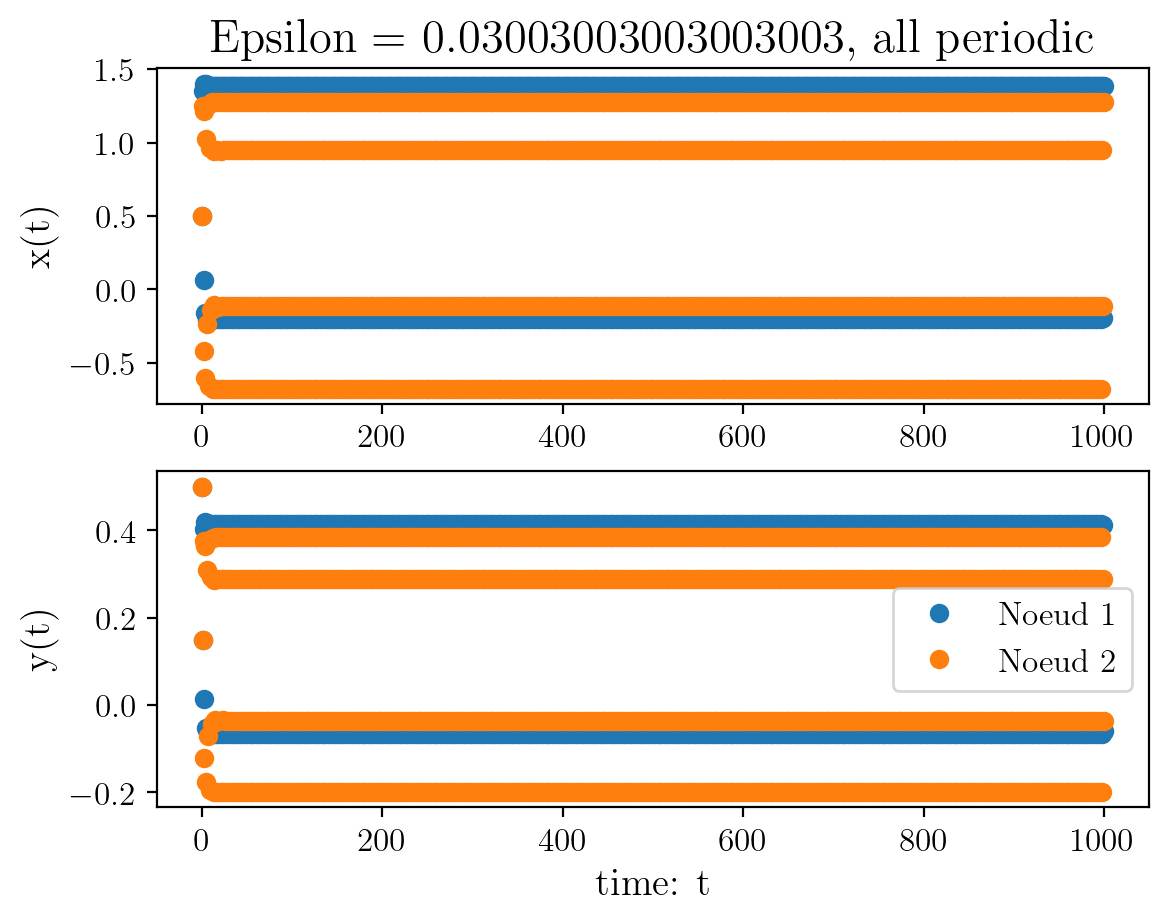

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data_period_x[:, 0, indexeps], 'o', label="Noeud 1")
ax[0].plot(data_period_x[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_xlabel("time: t")
ax[0].set_ylabel(r"x(t)")
ax[0].set_title(f"Epsilon = {Epsilon[indexeps]}, all periodic")
ax[1].plot(data_period_y[:, 0, indexeps], 'o', label="Noeud 1")
ax[1].plot(data_period_y[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_ylabel(r"y(t)")

plt.legend()
plt.show()

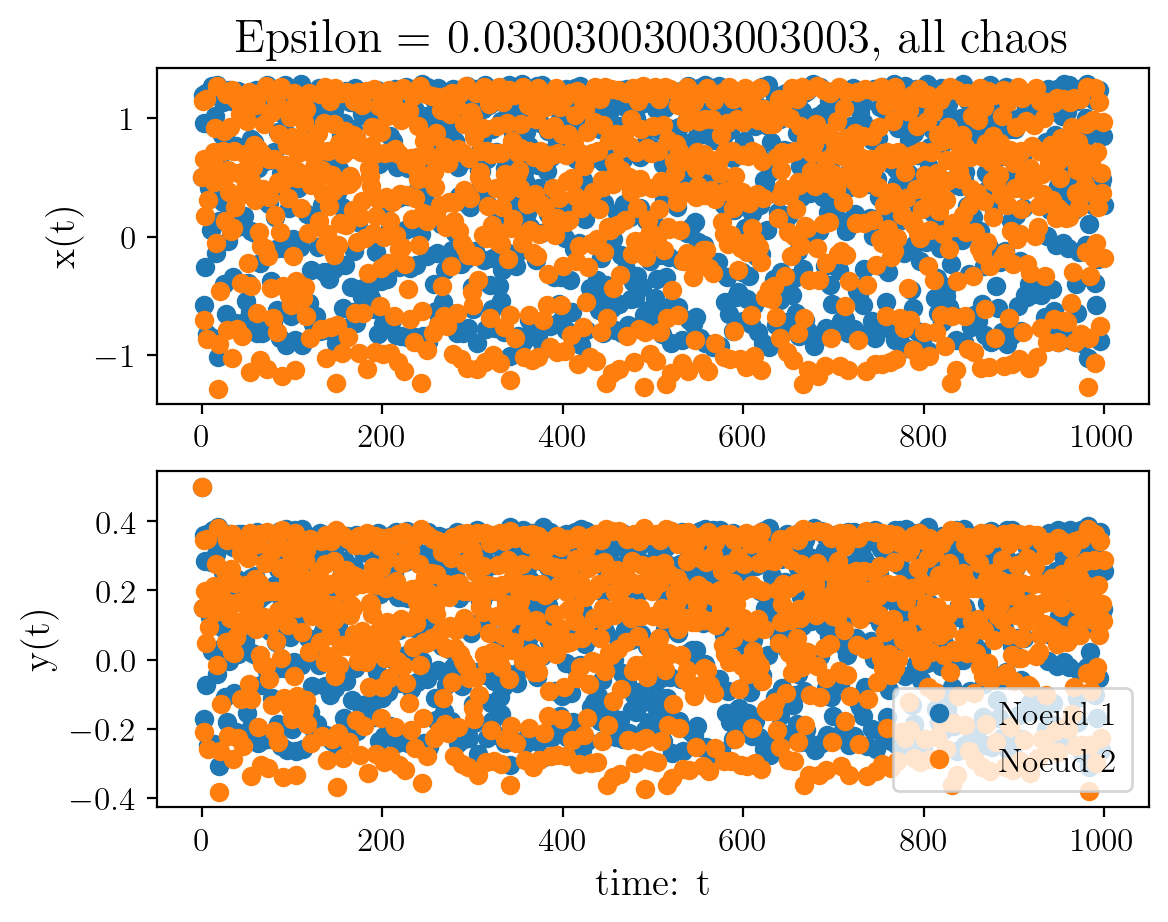

In [19]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data_chaos_x[:, 0, indexeps], 'o', label="Noeud 1")
ax[0].plot(data_chaos_x[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_xlabel("time: t")
ax[0].set_ylabel(r"x(t)")
ax[0].set_title(f"Epsilon = {Epsilon[indexeps]}, all chaos")
ax[1].plot(data_chaos_y[:, 0, indexeps], 'o', label="Noeud 1")
ax[1].plot(data_chaos_y[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_ylabel(r"y(t)")
plt.legend()
plt.show()

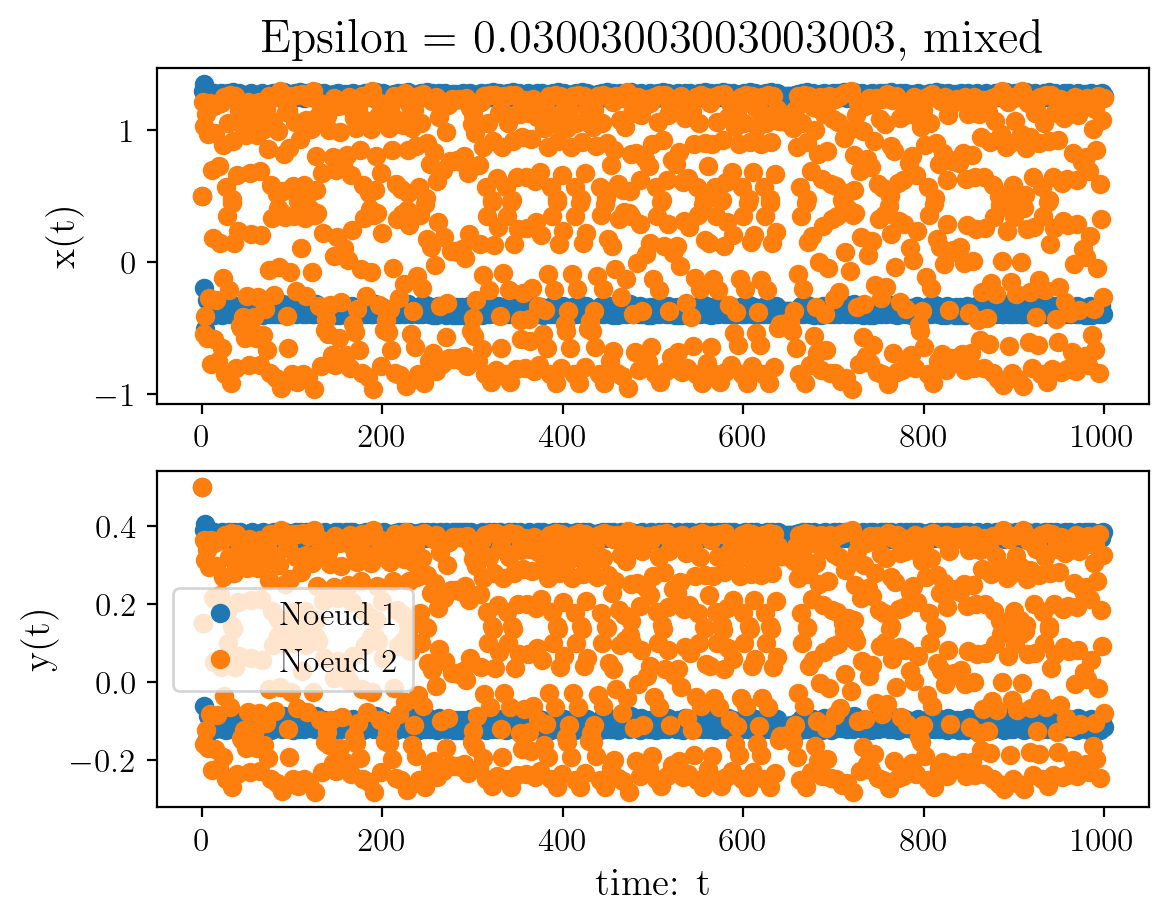

In [20]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data_mixed_x[:, 0, indexeps], 'o', label="Noeud 1")
ax[0].plot(data_mixed_x[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_xlabel("time: t")
ax[0].set_ylabel(r"x(t)")
ax[0].set_title(f"Epsilon = {Epsilon[indexeps]}, mixed")
ax[1].plot(data_mixed_y[:, 0, indexeps], 'o', label="Noeud 1")
ax[1].plot(data_mixed_y[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_ylabel(r"y(t)")
plt.legend()
plt.show()

One way to detect periodicity is through Fourier transform

In [273]:
power = welch(data_period_x[:, 1, indexeps], fs=1/N, nperseg=512, scaling='spectrum')

In [267]:
print(np.shape(power))

(2, 257)


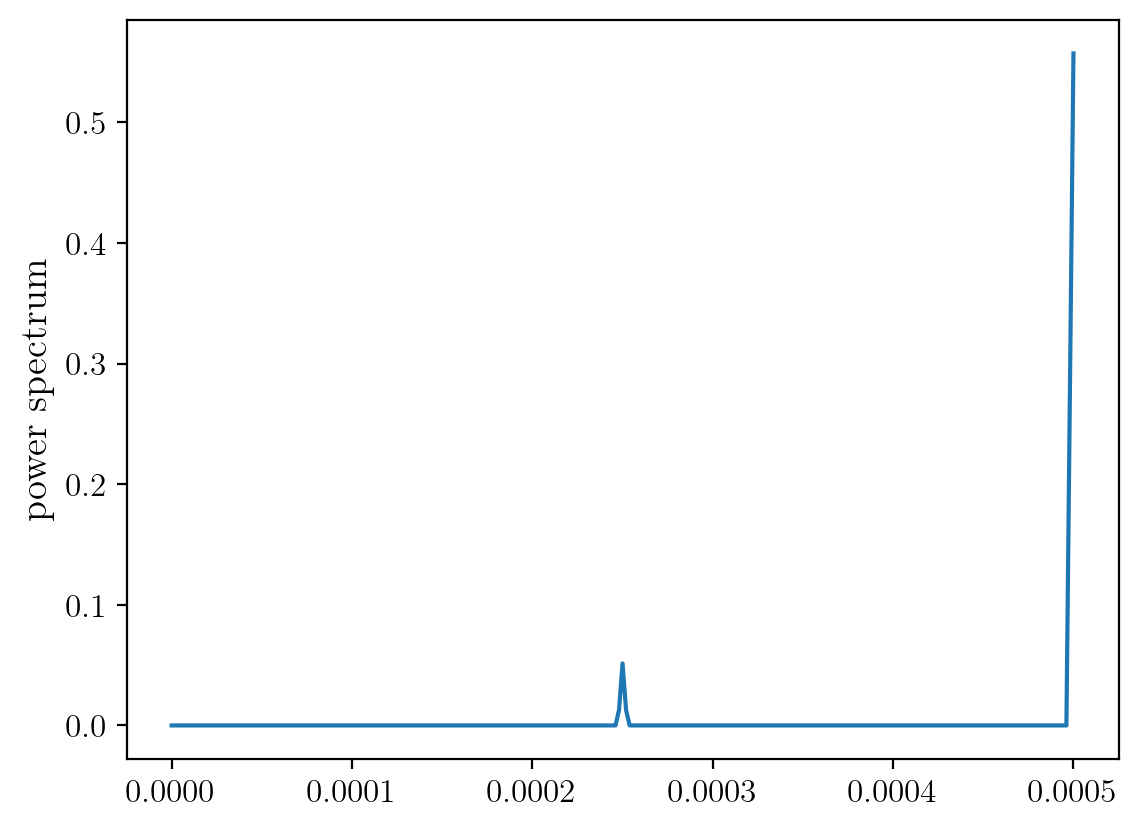

In [274]:
fig, ax = plt.subplots()
ax.plot(power[0], power[1])
ax.set_ylabel("power spectrum")
plt.show()

The transition with MSD

In [308]:
msd_mixed_x, msd_mixed_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [309]:
msd_chaos_x, msd_chaos_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [310]:
msd_period_x, msd_period_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [340]:
msd_period_time_x, msd_period_time_y = np.zeros((N, len(Epsilon))), np.zeros((N, len(Epsilon)))

In [ ]:
for i in tqdm(range(len(Epsilon))):
    msd_period_x[i], msd_period_y[i] = (
        MSD(G, data_period_x[:, :, i]),
        MSD(G, data_period_y[:, :, i]),
    )

100%|██████████| 10000/10000 [00:00<00:00, 19640.03it/s]


In [ ]:
for i in tqdm(range(len(Epsilon))):
    msd_mixed_x[i], msd_mixed_y[i] = (
        MSD(G, data_mixed_x[:, :, i], axe=0),
        MSD(G, data_mixed_y[:, :, i], axe=0),
    )

100%|██████████| 10000/10000 [00:00<00:00, 19713.13it/s]


In [ ]:
for i in tqdm(range(len(Epsilon))):
    msd_period_time_x[:, i], msd_period_time_y[:, i] = (
        MSD(G, data_period_x[:, :, i], average=False),
        MSD(G, data_period_y[:, :, i], average=False),
    )

100%|██████████| 1000/1000 [00:00<00:00, 1899.41it/s]


In [ ]:
for i in tqdm(range(len(Epsilon))):
    msd_chaos_x[i], msd_chaos_y[i] = (
        MSD(G, data_chaos_x[:, :, i]),
        MSD(G, data_chaos_y[:, :, i]),
    )

100%|██████████| 10000/10000 [00:00<00:00, 19756.67it/s]


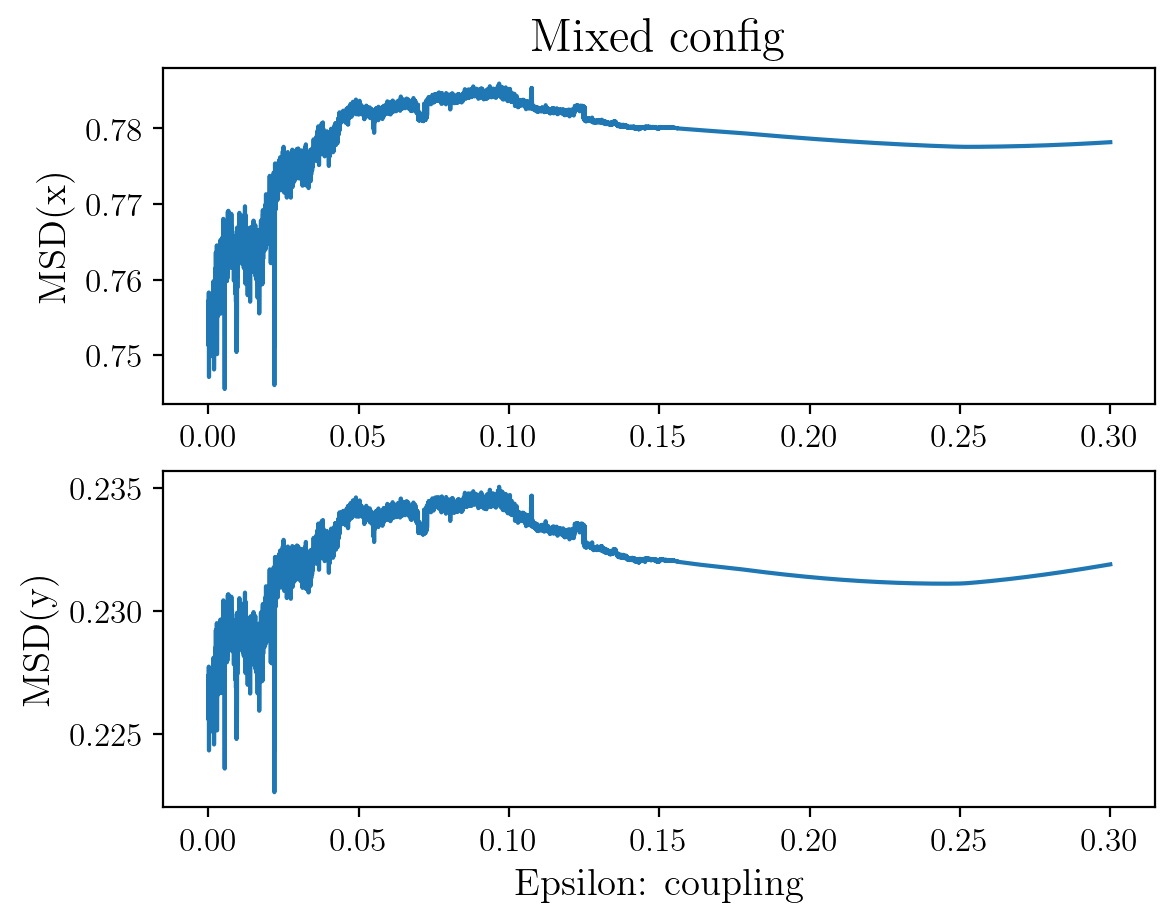

In [317]:
fig, ax = plt.subplots(2,1)
ax[0].plot(Epsilon,msd_mixed_x)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Mixed config")
ax[1].plot(Epsilon,msd_mixed_y)
ax[1].set_ylabel("MSD(y)")
plt.show()

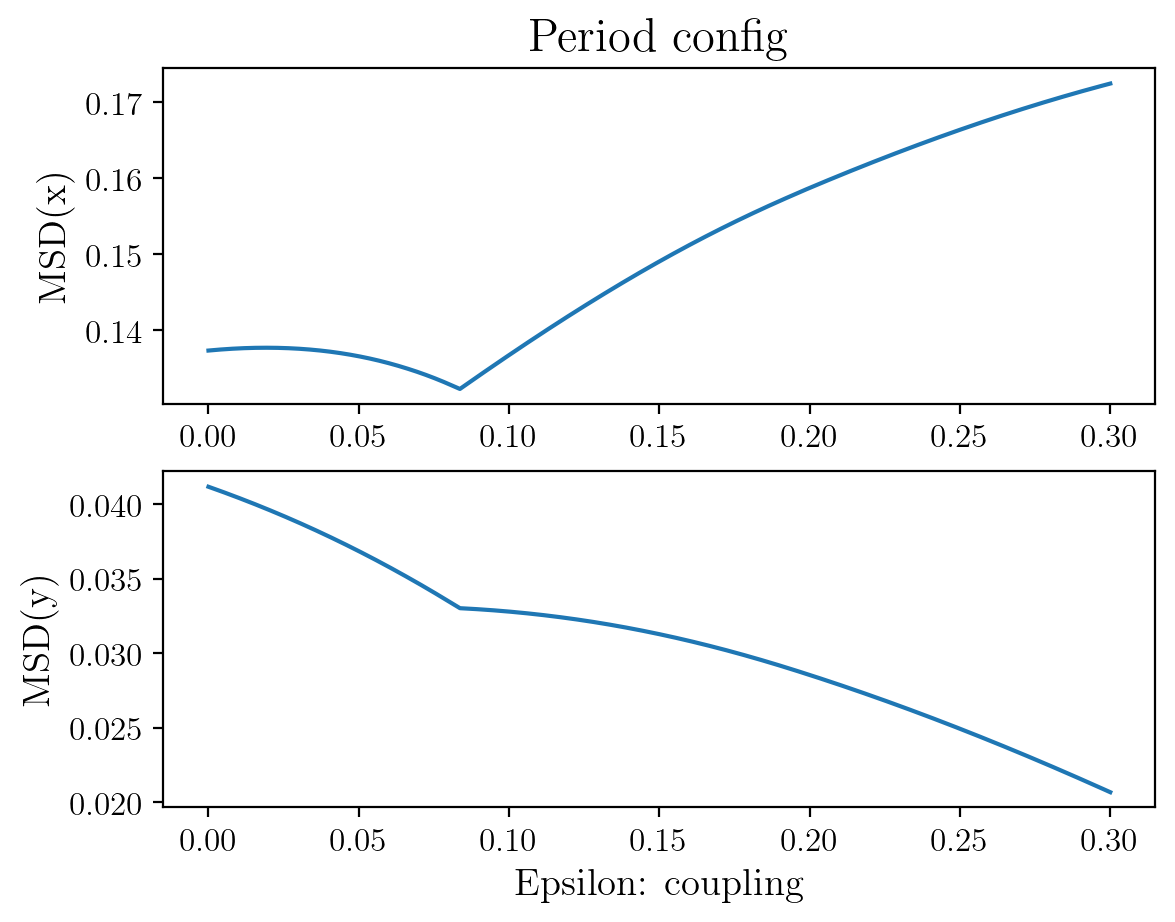

In [318]:
fig, ax = plt.subplots(2,1)
ax[0].plot(Epsilon,msd_period_x)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Period config")
ax[1].plot(Epsilon,msd_period_y)
ax[1].set_ylabel("MSD(y)")
plt.show()

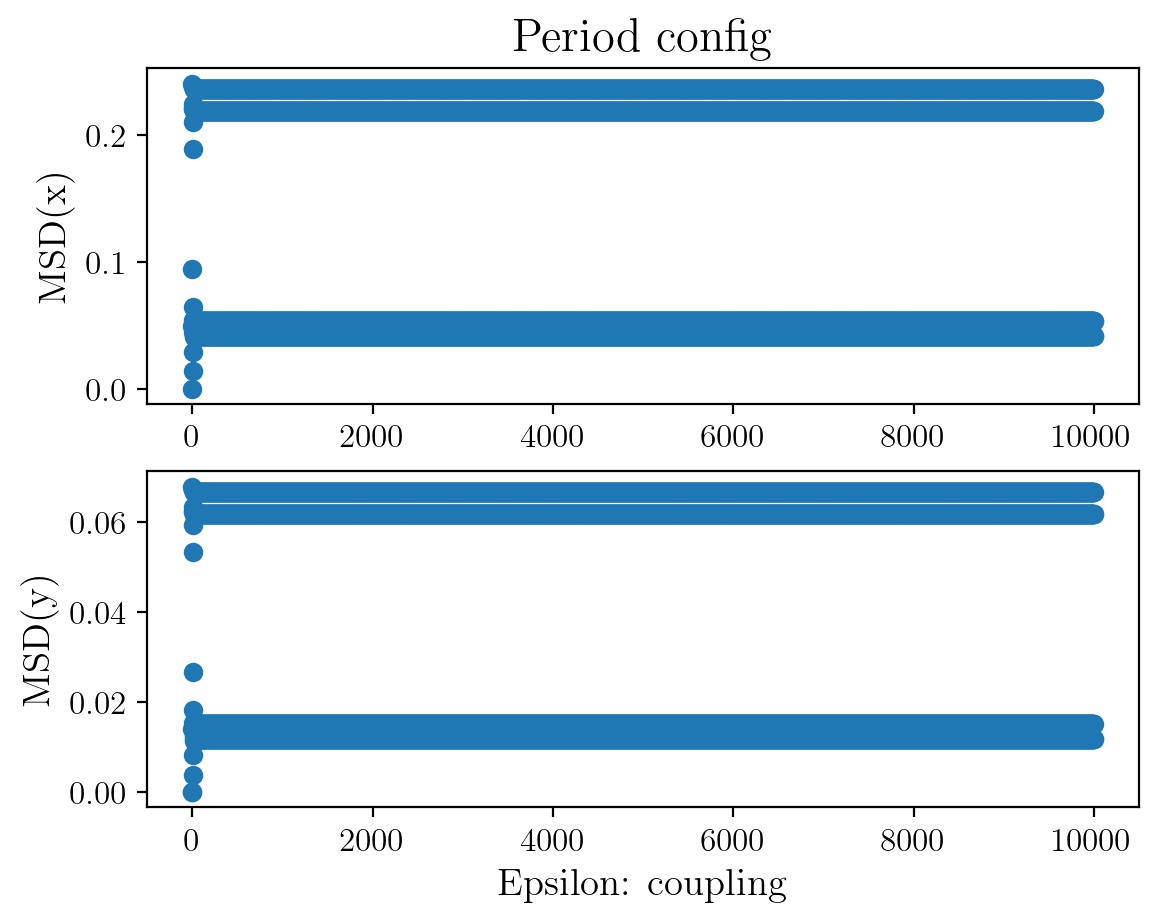

In [343]:
fig, ax = plt.subplots(2,1)
ax[0].plot(msd_period_time_x[:, indexeps], 'o')
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Period config")
ax[1].plot(msd_period_time_y[:, indexeps], 'o')
ax[1].set_ylabel("MSD(y)")
plt.show()

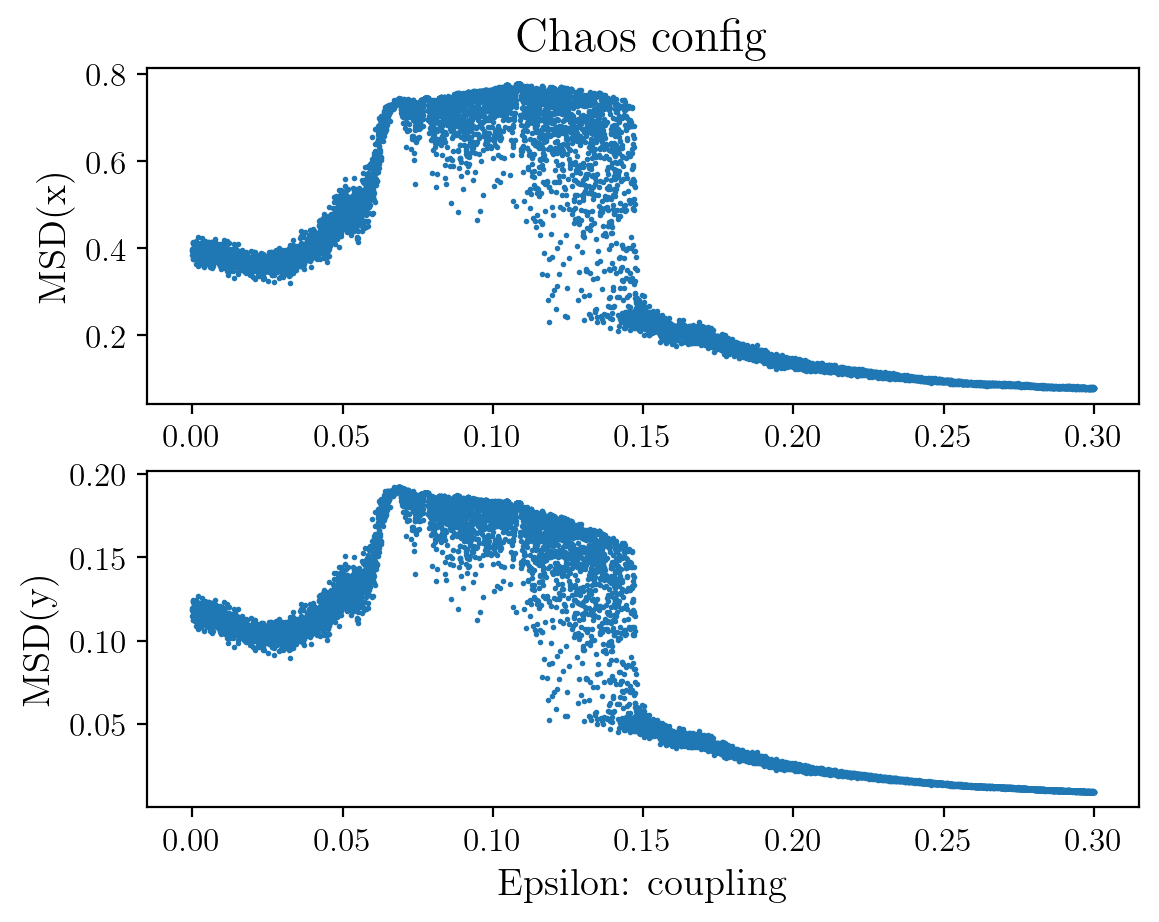

In [319]:
fig, ax = plt.subplots(2,1)
ax[0].scatter(Epsilon,msd_chaos_x, s=1)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Chaos config")
ax[1].scatter(Epsilon,msd_chaos_y, s=1)
ax[1].set_ylabel("MSD(y)")
plt.show()

Those plots tend to think focus on chaotic configuration is enough

In [176]:
msd_reversed_chaos_x, msd_reversed_chaos_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [ ]:
for i in tqdm(range(len(Epsilon))):
    msd_reversed_chaos_x[i], msd_reversed_chaos_y[i] = (
        MSD_inverse(G, data_chaos_x[:, :, i], axe=1),
        MSD_inverse(G, data_chaos_y[:, :, i], axe=1),
    )

100%|██████████| 10000/10000 [00:00<00:00, 28841.14it/s]


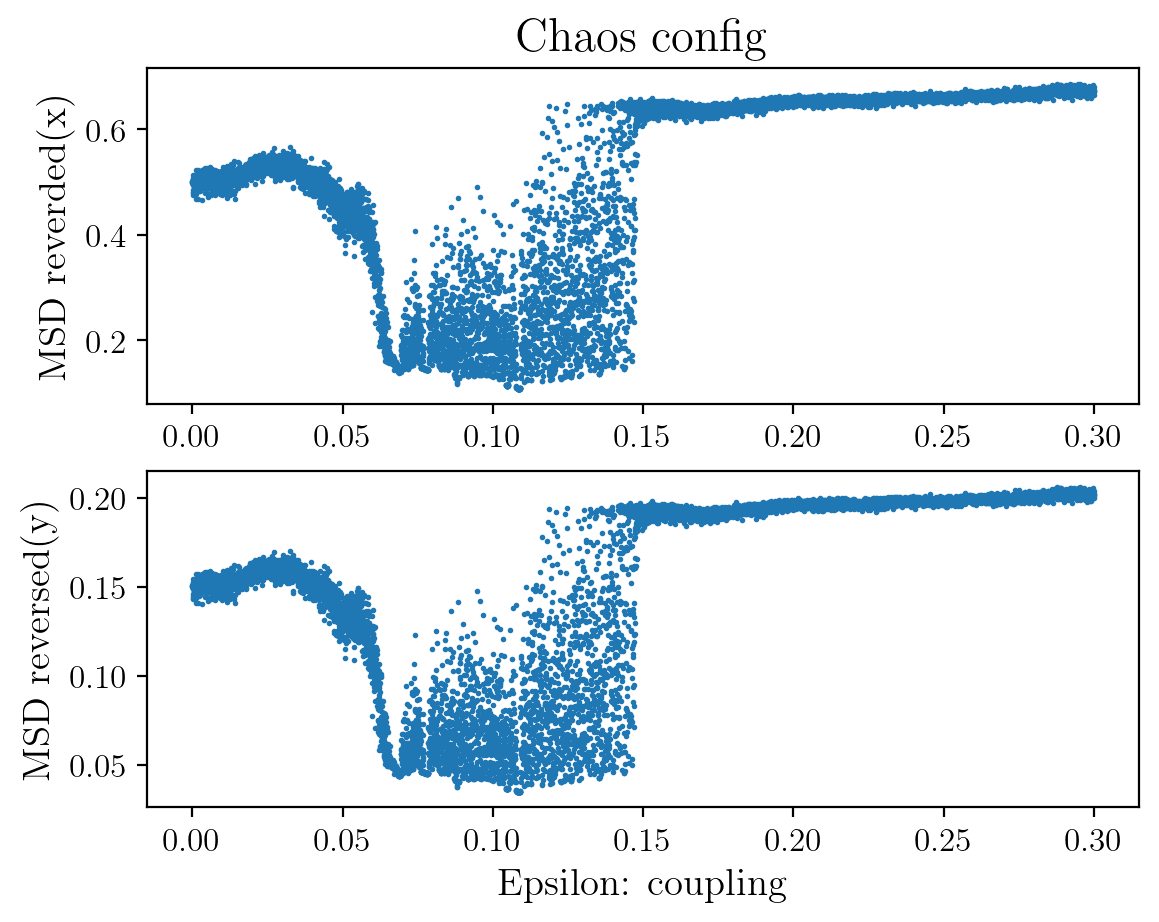

In [178]:
fig, ax = plt.subplots(2,1)
ax[0].scatter(Epsilon,msd_reversed_chaos_x, s=1)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD reverded(x)")
ax[0].set_title("Chaos config")
ax[1].scatter(Epsilon,msd_reversed_chaos_y, s=1)
ax[1].set_ylabel("MSD reversed(y)")
plt.show()

It looks like there are transitions for every msd